In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.externals import joblib
from sklearn.preprocessing import QuantileTransformer

In [105]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

In [5]:
data = joblib.load('final_etsy_data.pkl')
reduced_data = data[data['price'] < 250]
prices = np.array(reduced_data['price'].tolist())
views = np.array(reduced_data['views_week'].tolist())

In [6]:
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(prices.reshape(-1,1))
quantile_prices = quantile_transformer.transform(prices.reshape(-1,1))
quantile_transformer = QuantileTransformer(output_distribution='normal').fit(views.reshape(-1,1))
quantile_views = quantile_transformer.transform(views.reshape(-1,1))

In [11]:
sorted_prices = sorted(prices)

In [18]:
sorted_quantile_prices = sorted(quantile_prices.reshape(1, -1))

In [19]:
sorted_quantile_views = sorted(quantile_views.reshape(1, -1))

In [12]:
sorted_views = sorted(views)

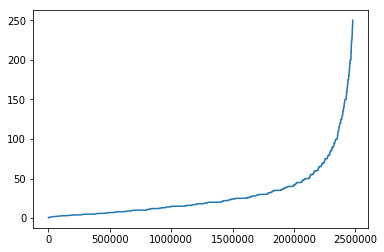

In [13]:
plt.plot(sorted_prices)

(array([1615836.,  508063.,  147567.,   81771.,   36267.,   35164.,
          19290.,   19890.,    8137.,    6679.]),
 array([2.00000e-01, 2.51790e+01, 5.01580e+01, 7.51370e+01, 1.00116e+02,
        1.25095e+02, 1.50074e+02, 1.75053e+02, 2.00032e+02, 2.25011e+02,
        2.49990e+02]),
 <a list of 10 Patch objects>)

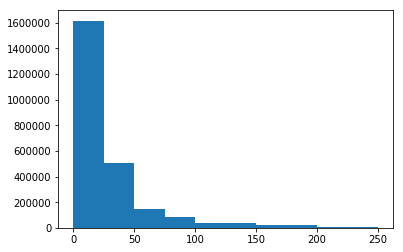

In [15]:
plt.hist(sorted_prices)

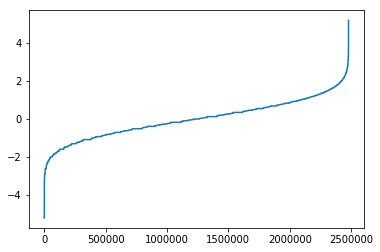

In [9]:
plt.plot(sorted_quantile_prices)

(array([8.21000e+02, 1.77200e+03, 4.23840e+04, 3.36419e+05, 8.35330e+05,
        8.81608e+05, 3.31073e+05, 4.68540e+04, 2.11600e+03, 2.87000e+02]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

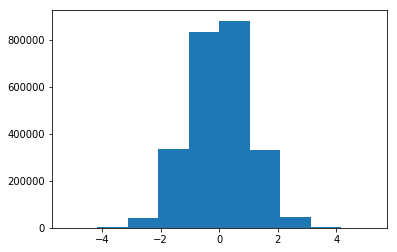

In [20]:
plt.hist(sorted_quantile_prices)

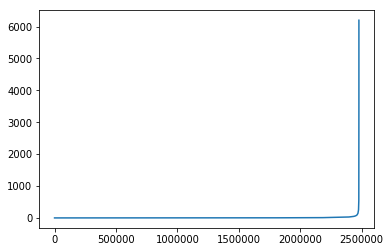

In [14]:
plt.plot(sorted_views)

(array([2.47807e+06, 4.63000e+02, 8.90000e+01, 2.10000e+01, 1.10000e+01,
        4.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   0.        ,  619.96762603, 1239.93525206, 1859.90287809,
        2479.87050412, 3099.83813015, 3719.80575618, 4339.77338222,
        4959.74100825, 5579.70863428, 6199.67626031]),
 <a list of 10 Patch objects>)

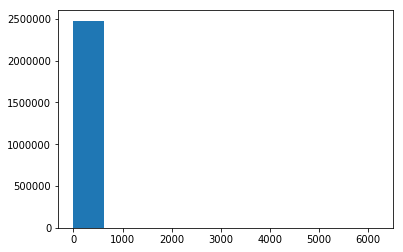

In [21]:
plt.hist(sorted_views)

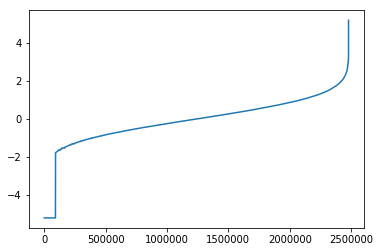

In [10]:
plt.plot(sorted_quantile_views)

(array([9.18130e+04, 0.00000e+00, 0.00000e+00, 2.72519e+05, 8.70535e+05,
        8.72313e+05, 3.24122e+05, 4.66000e+04, 7.43000e+02, 1.90000e+01]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

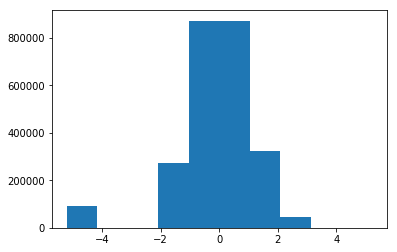

In [22]:
plt.hist(sorted_quantile_views)

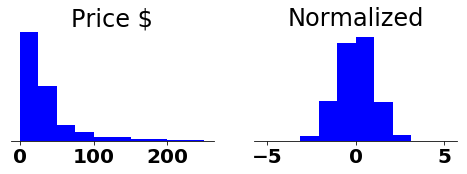

In [108]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

ax0.hist(sorted_prices, color='blue')
ax0.set_title("Price $")
ax0.set_yticks([])
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
#ax0.set_xticks([])
ax0.set_ylim(0, 1000000)
ax1.hist(sorted_quantile_prices, color='blue')
ax1.set_title("Normalized")
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.set_xticks([])

plt.savefig('Prices Normalization', bbox_inches='tight')
plt.show()

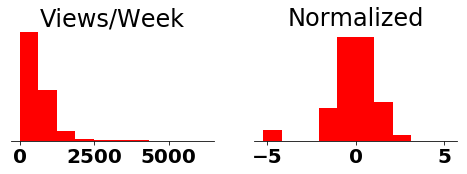

In [107]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

ax0.hist(sorted_views, color='red')
ax0.set_title("Views/Week")
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_yticks([])
#ax0.set_xticks([])
ax0.set_ylim(0, 1000)
ax1.hist(sorted_quantile_views, color='red')
ax1.set_title("Normalized")
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_yticks([])
#ax1.set_xticks([])

plt.savefig('Views Normalization', bbox_inches='tight')
plt.show()